# King County Housing Data Analysis and Price Predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
houses = pd.read_csv('kc_house_data.csv')

In [3]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Missing Values

In [5]:
houses.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
houses[houses['sqft_above'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,1736800520,20150403T000000,662500.0,3,2.5,3560,9796,1.0,0,0,...,8,NaN,1700,1965,0,98007,47.6007,-122.145,2210,8925
17,6865200140,20140529T000000,485000.0,4,1.0,1600,4300,1.5,0,0,...,7,NaN,0,1916,0,98103,47.6648,-122.343,1610,4300


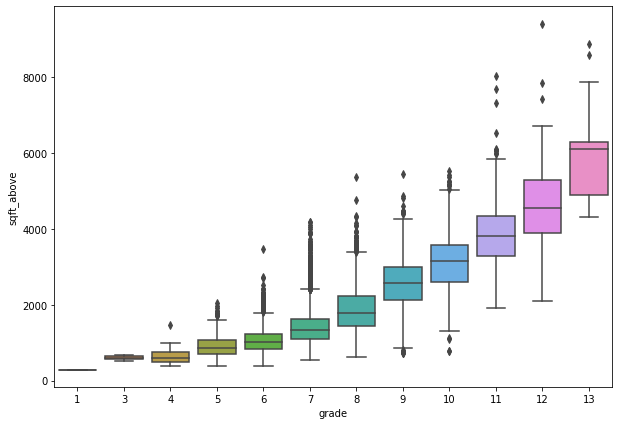

In [7]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='grade', y='sqft_above', data=houses)

I will fill up these null values with the mean of sqft_above value for that grade

In [8]:
houses['sqft_above'] = houses[['sqft_above', 'grade']].apply(
    lambda sqft_grade:
    houses.groupby('grade').mean()['sqft_above'].loc[sqft_grade[1]] if pd.isnull(sqft_grade[0]) else sqft_grade[0],
    axis=1
)

### Correaltion Matrix

Full Correlation Heatmap:

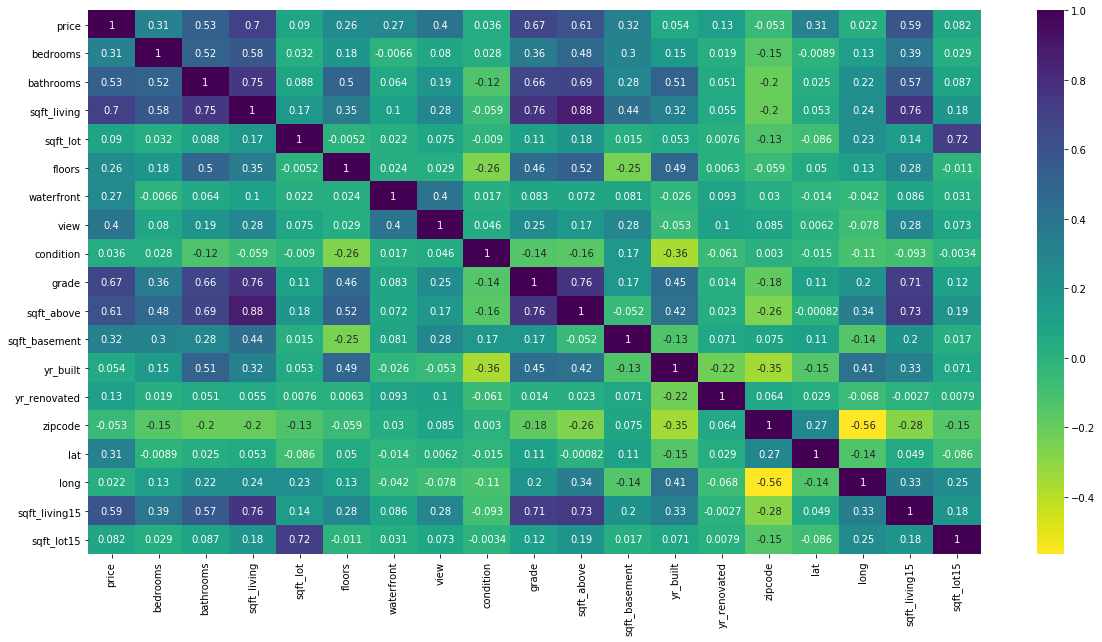

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(houses.drop('id', axis=1).corr(), annot=True, cmap='viridis_r')

Correalation of house price with others

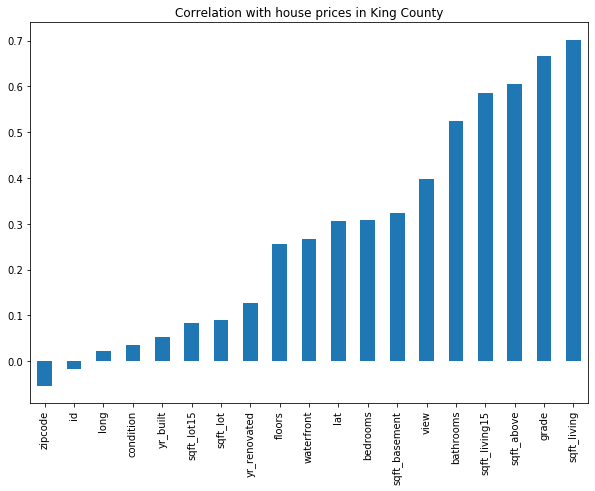

In [10]:
plt.figure(figsize=(10, 7))
houses.corr().sort_values('price').drop('price')['price'].plot(kind='bar', title='Correlation with house prices in King County')

### Number of Bedrooms

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Number of bedrooms'),
 Text(0.5, 1.0, 'Number of different houses depending on bedrooms')]

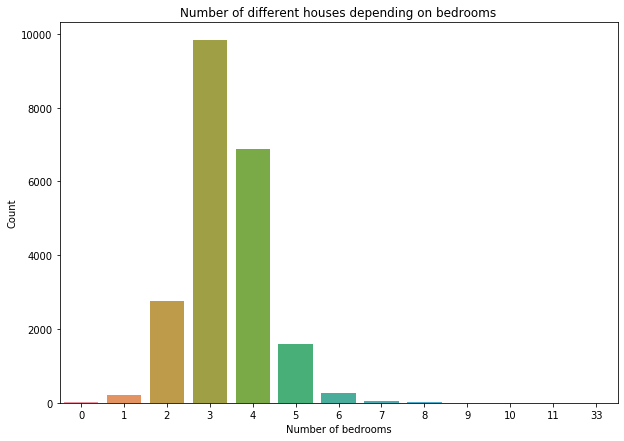

In [11]:
plt.figure(figsize=(10, 7))
sns.countplot(x='bedrooms', data=houses).set(ylabel='Count', title='Number of different houses depending on bedrooms', xlabel='Number of bedrooms')

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Number of Bedrooms'),
 Text(0.5, 1.0, 'Comparison of House price and number of bedrooms')]

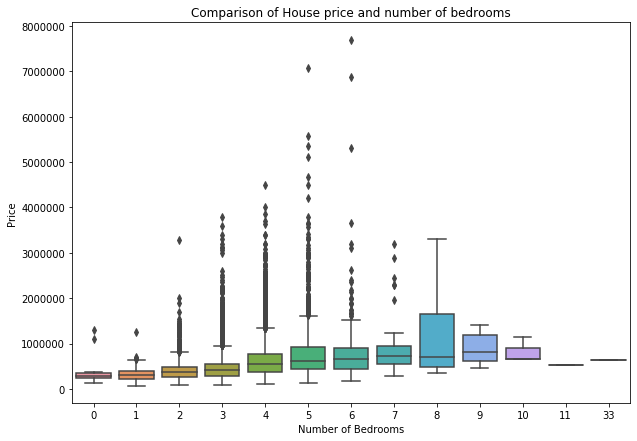

In [12]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='bedrooms', y='price', data=houses).set(xlabel='Number of Bedrooms', ylabel='Price', title='Comparison of House price and number of bedrooms')

Number of bedrooms do not seem to have very high correalation to house price in King County. Most houses are priced below 1 million USD as mean values for all the boxes fall below this price.

In [13]:
print('Correlation value between Number of Bedrooms and Price: ', houses.corr().loc['price', 'bedrooms'])

Correlation value between Number of Bedrooms and Price:  0.3083495981456364


### Sqft Living Space

[Text(0, 0.5, 'Price of the house'), Text(0.5, 0, 'Sqft Living Space')]

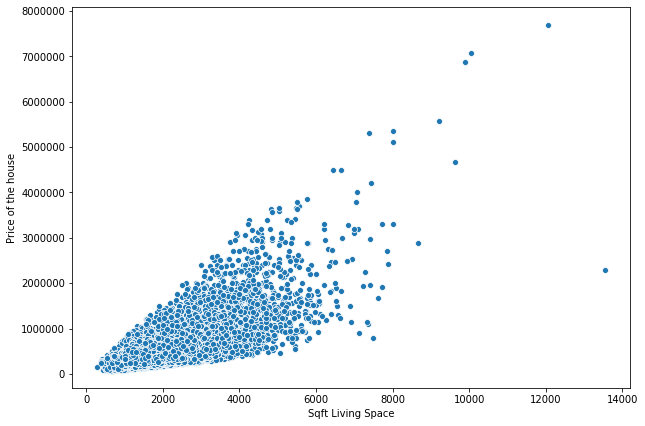

In [14]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='sqft_living', y='price', data=houses).set(xlabel='Sqft Living Space', ylabel='Price of the house')

It seems that sqft living space has a high correation with house price. However, there are some very big outliers here.
These outlier can have an adverse effect on the accuracy of our model.

### Waterfront

[Text(0, 0.5, 'Price'),
 [Text(0, 0, 'Do not have waterfront'), Text(0, 0, 'Have waterfront')],
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Comparison of prices for houses having a waterfront or not')]

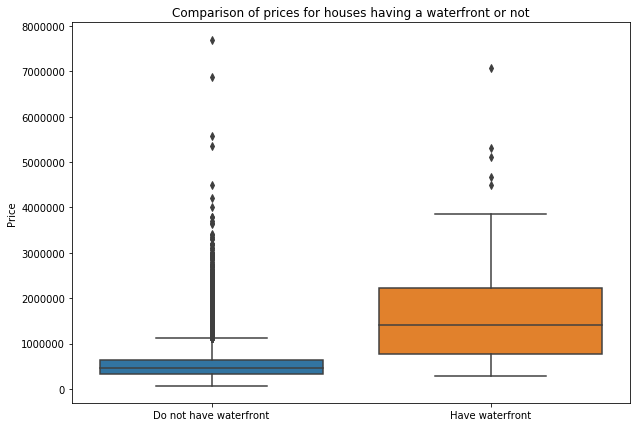

In [15]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='waterfront', y='price', data=houses).set(xlabel='', ylabel='Price', title='Comparison of prices for houses having a waterfront or not',
                                                        xticklabels=['Do not have waterfront', 'Have waterfront'])

[Text(0, 0.5, 'Price'),
 [Text(0, 0, 'Do not have waterfront'), Text(0, 0, 'Have waterfront')],
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Number of waterfront and non waterfront houses')]

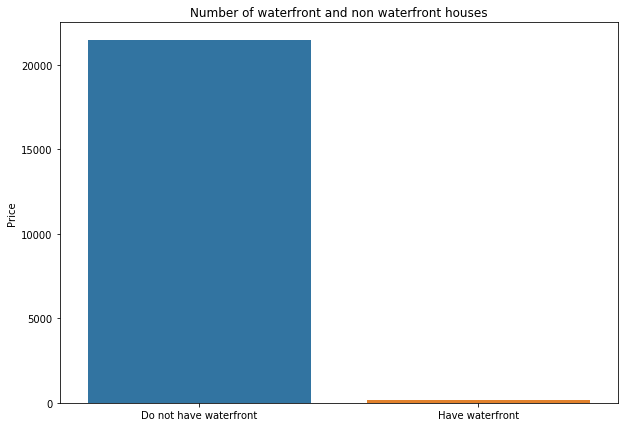

In [16]:
plt.figure(figsize=(10, 7))
sns.countplot(x='waterfront', data=houses).set(xlabel='', ylabel='Price', title='Number of waterfront and non waterfront houses',
                                             xticklabels=['Do not have waterfront', 'Have waterfront'])

Houses that are waterfront properties do tend to have higher prices. But the number of waterfront properties in the sample with regards to non waterfront properties are very low.

### Year Built and Year Renovated

Year Built:

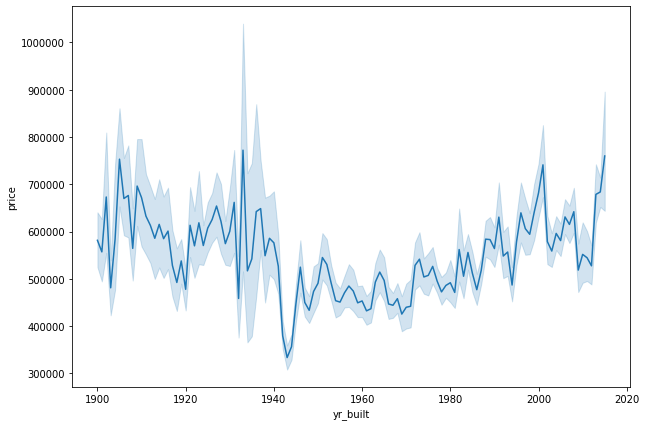

In [17]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='yr_built', y='price', data=houses)

In [18]:
houses['century_old'] = houses['yr_built'].apply(lambda year: 1 if year <= 1915 else 0)

[Text(0, 0.5, 'Price'),
 [Text(0, 0, 'Less than 100 years old'), Text(0, 0, 'Over a 100 years Old')],
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Comparison of prices depending on the year the house was built')]

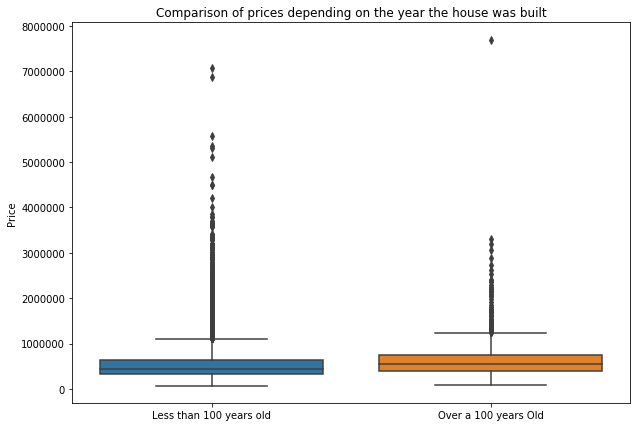

In [19]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='century_old', y='price', data=houses).set(xlabel='', ylabel='Price', title='Comparison of prices depending on the year the house was built',
                                                        xticklabels=['Less than 100 years old', 'Over a 100 years Old'])

[Text(0, 0.5, 'Price'),
 [Text(0, 0, 'Less than 100 years old'), Text(0, 0, 'Over a 100 years Old')],
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Number of Houses according to thier age')]

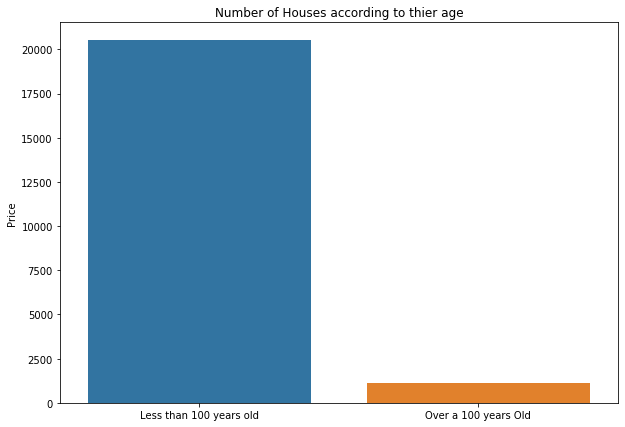

In [20]:
plt.figure(figsize=(10, 7))
sns.countplot(x='century_old', data=houses).set(xlabel='', ylabel='Price', title='Number of Houses according to thier age',
                                                xticklabels=['Less than 100 years old', 'Over a 100 years Old'])

Houses that are over a 100 years old tend to have a higher price point.

Let's use the newly ctreated feature century_old instead of yr_built for training the model.

In [21]:
houses.drop('yr_built', axis=1, inplace=True)

Year Renovated:

In [22]:
houses['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

A lot af values are 0, which suggest no renovation work done on the houses. Let's see how the renovation affect the prices for the houses:

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Year of Renotation'),
 Text(0.5, 1.0, 'Relation between house price and year of renovation')]

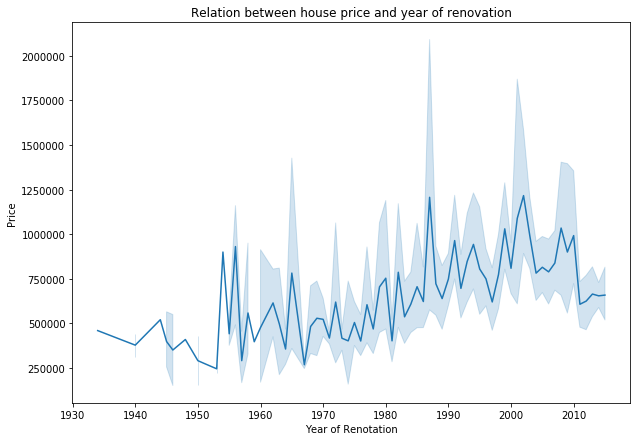

In [23]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='yr_renovated', y='price', data=houses[houses['yr_renovated'] != 0]).set(xlabel='Year of Renotation', ylabel='Price',
                                                                                        title='Relation between house price and year of renovation')

Recently renovated houses seem to have higher price.

### Latitude and Logitude

Lets see the map of King County, for reference:

<img src="https://www.kingcounty.gov/about/region/~/media/about/maps/KC_simplemap_Oct2013.ashx" />

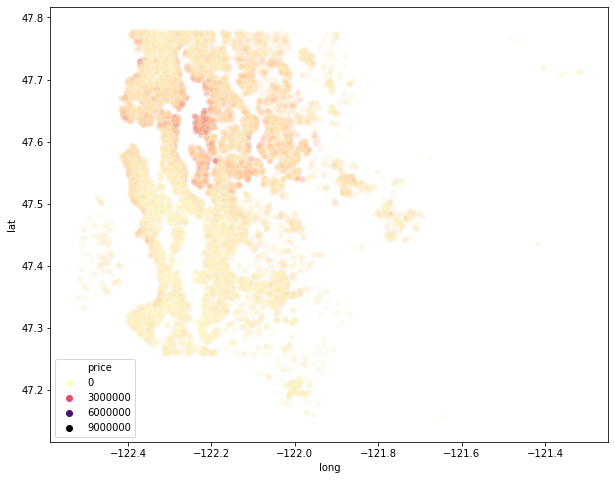

In [24]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=houses, hue='price', palette='magma_r', alpha=0.15)

It looks like, the prices are very evenly spread among the County. But there is an issue, if we look at the legend the price is 3 million USD. We saw earlier that most of the houses are priced below 1 million. So let's see waht percentage of houses are in the below 3, 2.5, 2 and 1.5 million price limit

In [25]:
print('Percentage of houses priced below 3 million USD: ', len(houses[houses['price'] < 3000000]) / len(houses) * 100)
print('Percentage of houses priced below 2.5 million USD: ', len(houses[houses['price'] < 2500000]) / len(houses) * 100)
print('Percentage of houses priced below 2 million USD: ', len(houses[houses['price'] < 2000000]) / len(houses) * 100)
print('Percentage of houses priced below 1.5 million USD: ', len(houses[houses['price'] < 1500000]) / len(houses) * 100)

Percentage of houses priced below 3 million USD:  99.76865775227873
Percentage of houses priced below 2.5 million USD:  99.5280618146486
Percentage of houses priced below 2 million USD:  99.05149678434275
Percentage of houses priced below 1.5 million USD:  97.53389163929117


It seems if we put a cap on price at 2 million we will be losing just 1% of data. Lets see how adding this cap affects our latitude and longitude analysis

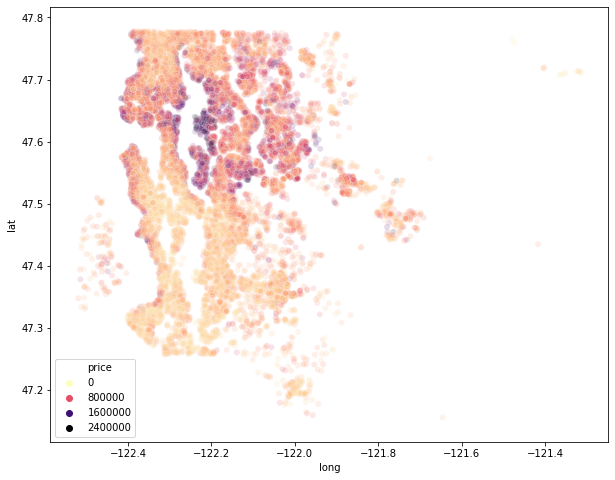

In [26]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=houses[houses['price'] < 2000000], hue='price', palette='magma_r', alpha=0.15)

If we refer to attached map, the high price areas correspond to urban areas in Seattle, Mercer Island and Bellevue.

As we can get the area related information from the combination of latitude and longitude, I believe zipcode can be dropped.

In [27]:
houses.drop('zipcode', axis=1, inplace=True)

I am creating a categoreical column zone by splitting the map in 4 parts depending on latitude and longitude columns

In [28]:
lat_mid = houses['lat'].min() + ((houses['lat'].max() - houses['lat'].min()) / 2)
long_mid = houses['long'].min() + ((houses['long'].max() - houses['long'].min()) / 2)

In [29]:
houses['zone'] = houses[['lat', 'long']].apply(
    lambda lat_long:
    1 if ((lat_long[0] < lat_mid) and (lat_long[1] < long_mid)) else (
        2 if ((lat_long[0] >= lat_mid) and (lat_long[1] < long_mid)) else (
            3 if ((lat_long[0] < lat_mid) and (lat_long[1] >= long_mid)) else 4
        )
    ),
    axis=1
)

In [30]:
houses = pd.concat([houses.drop(['lat', 'long', 'zone'], axis=1), pd.get_dummies(houses['zone'], drop_first=True)], axis =1)

In [31]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,century_old,2,3,4
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,0,1340,5650,0,1,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1991,1690,7639,0,1,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,0,2720,8062,0,1,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,0,1360,5000,0,1,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,0,1800,7503,0,1,0,0


### Date

In [32]:
houses['date'] = pd.to_datetime(houses['date'])

In [33]:
houses['year_sold'] = houses['date'].apply(lambda date: date.year)
houses['month_sold'] = houses['date'].apply(lambda date: date.month)

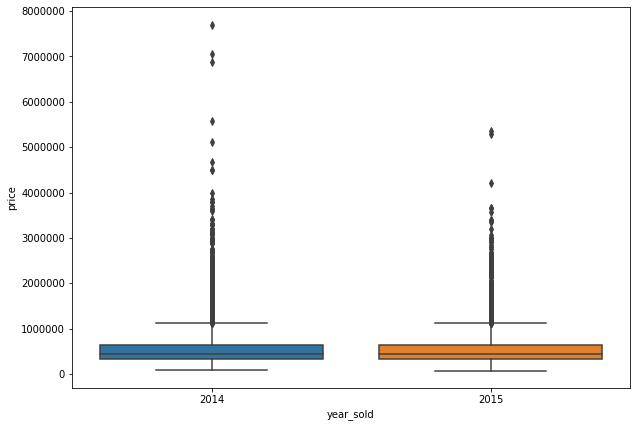

In [34]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='year_sold', y='price', data=houses)

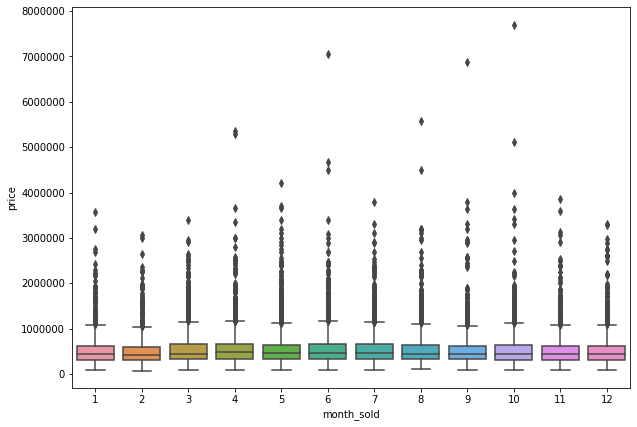

In [35]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='month_sold', y='price', data=houses)

In [36]:
print('min: ', houses['date'].min(), '\nmax: ',houses['date'].max())

min:  2014-05-02 00:00:00 
max:  2015-05-27 00:00:00


Both year and month of sale seem to have no effect on the price of the house. It dose make sense to me as the data spans for just 13 months which is not a big enough window for fluctuations in house prices.

Since the date and it's extracted features do not have much effect on house price. I will drop them.

In [37]:
houses.drop(['date', 'year_sold', 'month_sold'], axis=1, inplace=True)

### ID

Id column is just a unique identifier and not a feature so I will drop it.

In [38]:
houses.drop('id', axis=1, inplace=True)

### Train Test Split and Data Standardization

In [39]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
 15  century_old    21613 non-null  int64  
 16  2              21613 non-null  uint8  
 17  3              21613 non-null  uint8  
 18  4     

In [40]:
X = houses.drop('price', axis=1)
y = houses['price']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr_model = LinearRegression()

In [48]:
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
lr_predictions = lr_model.predict(X_test)

### Random Forrest

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 100, num = 10)],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [53]:
rf = RandomForestRegressor()

In [54]:
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=1, random_state=11, n_jobs = -1)

In [55]:
rf_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [56]:
rf_random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50}

In [57]:
rf_predictions = rf_random_search.predict(X_test)

### ANN

In [58]:
from tensorflow.keras.models import Sequential

In [59]:
from tensorflow.keras.layers import Dense

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
ann = Sequential()

In [62]:
ann.add(Dense(18, activation='relu'))
ann.add(Dense(18, activation='relu'))
ann.add(Dense(18, activation='relu'))
ann.add(Dense(18, activation='relu'))
ann.add(Dense(1))

In [63]:
ann.compile(optimizer='adam', loss='mse')

In [64]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [65]:
ann.fit(x=X_train, y=y_train.values, verbose=1, batch_size=32, epochs=10000, validation_data=(X_test, y_test.values), callbacks=[early_stop], workers=4, use_multiprocessing=True)

Train on 15129 samples, validate on 6484 samples
Epoch 1/10000
15129/15129 [==============================] - 2s 139us/sample - loss: 402171498025.7275 - val_loss: 234135782942.6379
Epoch 2/10000
15129/15129 [==============================] - 1s 83us/sample - loss: 90860083528.2702 - val_loss: 54350929642.0481
Epoch 3/10000
15129/15129 [==============================] - 1s 93us/sample - loss: 54766917283.6952 - val_loss: 45801664159.5065
Epoch 4/10000
15129/15129 [==============================] - 1s 86us/sample - loss: 48012185008.9783 - val_loss: 41490835079.5015
Epoch 5/10000
15129/15129 [==============================] - 1s 86us/sample - loss: 44594439221.6739 - val_loss: 38822775966.5589
Epoch 6/10000
15129/15129 [==============================] - 1s 90us/sample - loss: 42446680310.6426 - val_loss: 37313450821.6459
Epoch 7/10000
15129/15129 [==============================] - 1s 88us/sample - loss: 41088440586.0004 - val_loss: 36258659472.6613
Epoch 8/10000
15129/15129 [===========

In [66]:
ann_predictions = ann.predict(X_test)

### Comparision

In [67]:
predictions_df = pd.DataFrame(y_test)
predictions_df['Linear Regression'] = lr_predictions
predictions_df['Random Forrest Regressor'] = rf_predictions
predictions_df['Artifical Neural Network'] = ann_predictions

In [68]:
predictions_df.head()

,price,Linear Regression,Random Forrest Regressor,Artifical Neural Network
6444,343566.0,351307.982032,482106.943944,3.719686e+05
2258,372400.0,574443.015262,404908.481230,4.260364e+05
8954,1065500.0,864271.144104,587242.770805,6.849878e+05
5432,762500.0,864954.608342,712513.903817,7.831430e+05
5180,835000.0,967884.688888,870112.295363,1.058104e+06


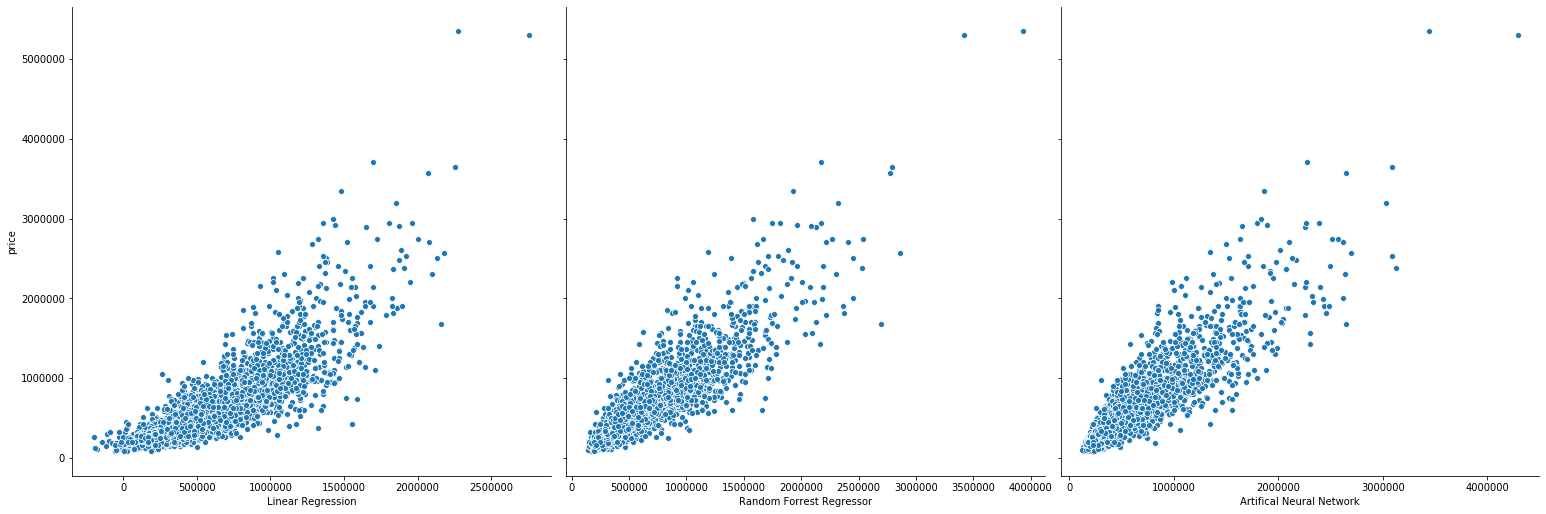

In [69]:
sns.pairplot(predictions_df, x_vars=['Linear Regression', 'Random Forrest Regressor', 'Artifical Neural Network'], y_vars=['price'], height=7)

In [70]:
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error, r2_score

In [71]:
print('Linear Regression:')
print('Mean Absolute Error:', mean_absolute_error(predictions_df['price'], predictions_df['Linear Regression']))
print('Mean Squared Error:', mean_squared_error(predictions_df['price'], predictions_df['Linear Regression']))
print('Explained Variance Score:', explained_variance_score(predictions_df['price'], predictions_df['Linear Regression']))
print('R2 Score:', r2_score(predictions_df['price'], predictions_df['Linear Regression']))

Linear Regression:
Mean Absolute Error: 128151.93668113917
Mean Squared Error: 38883469610.808846
Explained Variance Score: 0.6878310152999985
R2 Score: 0.6876704327792569


In [72]:
print('Random Forrest Regressor:')
print('Mean Absolute Error:', mean_absolute_error(predictions_df['price'], predictions_df['Random Forrest Regressor']))
print('Mean Squared Error:', mean_squared_error(predictions_df['price'], predictions_df['Random Forrest Regressor']))
print('Explained Variance Score:', explained_variance_score(predictions_df['price'], predictions_df['Random Forrest Regressor']))
print('R2 Score:', r2_score(predictions_df['price'], predictions_df['Random Forrest Regressor']))

Random Forrest Regressor:
Mean Absolute Error: 97985.90659765569
Mean Squared Error: 25904002078.19742
Explained Variance Score: 0.7920601579493451
R2 Score: 0.7919273706963742


In [73]:
print('Artifical Neural Network:')
print('Mean Absolute Error:', mean_absolute_error(predictions_df['price'], predictions_df['Artifical Neural Network']))
print('Mean Squared Error:', mean_squared_error(predictions_df['price'], predictions_df['Artifical Neural Network']))
print('Explained Variance Score:', explained_variance_score(predictions_df['price'], predictions_df['Artifical Neural Network']))
print('R2 Score:', r2_score(predictions_df['price'], predictions_df['Artifical Neural Network']))

Artifical Neural Network:
Mean Absolute Error: 103321.36867071831
Mean Squared Error: 27138239230.12235
Explained Variance Score: 0.7822531445231751
R2 Score: 0.7820134211603142
